In [81]:
import tweepy
import sys
import matplotlib.pyplot as plt
from textblob import TextBlob

def percentage(part,whole):
    return 100*float(part)/float(whole)



consumerKey = '********************'
consumerSecret = '************************************************'
accessToken = '***************************************************'
accessTokenSecret = '********************************************'

#Establishing the connection

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth,wait_on_rate_limit=True)


searchTerm=input("Enter the keyword/Hashtag to search about :")
noofsearchTerms=int(input("Enter the no. of tweets to analyze :"))

tweets = tweepy.Cursor(api.search, q=searchTerm,lang="en").items(noofsearchTerms)



csvFile = open('ua.csv', 'a')
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q=searchTerm,
                           lang="en",
                           since="2017-04-03").items(noofsearchTerms):
    print(tweet.created_at, tweet.text)
    print("   ")
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])



Enter the keyword/Hashtag to search about :Modi
Enter the no. of tweets to analyze :100
2018-07-24 05:49:53 RT @bainjal: While Modi is away on his now 80 plus foreign visit, &amp; will hit the campaign trial in UP after return, we have no finance mini…
   
2018-07-24 05:49:53 @rashtrapatibhvn @narendramodi @arunjaitley @PiyushGoyal @AmitShah @INCIndia @mukeshambani641 @TimesNow @aajtak… https://t.co/QJ3tGmWXdk
   
2018-07-24 05:49:51 RT @AshokGoelBJP: Record! PM Shri @narendramodi ji becomes 1st Indian PM to set foot in Rwanda. #BJPNewsTrack
#Rwanda https://t.co/aZhqS30m…
   
2018-07-24 05:49:48 RT @TheDesiEdge: Rahul: Where is Black Money?

Modi: I am a Tea Seller.😟

Rahul: Where is 15 lakhs?

Modi: I am son of Poor Mother. 😥

Rahu…
   
2018-07-24 05:49:48 RT @Tinni_Aphrodite: This mimicry by Prime Minister Modi was not merely politically incorrect and indecent, it was also racist and chauvini…
   
2018-07-24 05:49:47 RT @anandrai177: Rahul: Where is Black Money?
Modi: I am a Tea Sell

2018-07-24 05:49:02 RT @Sunil_Deodhar: FY18 witnesses highest road construction pace of 27 km per day, almost twice than that in the FY14: Report https://t.co/…
   
2018-07-24 05:49:02 RT @James_Beyond: I AM VOTING FOR MODI IN 2019! 😊

RT if you are one of me. 😊
   
2018-07-24 05:49:01 RT @abhijitmajumder: As PM Modi is set to visit South Africa for #BRICS, my piece in @MyNation recalling the dubious Gupta Brothers, UPA’s…
   
2018-07-24 05:48:59 @ViraatianSK They are doing Business for more than 30years.  Seen Many Governments.  

MODI will go in Eight Months.
   
2018-07-24 05:48:57 RT @SheopurGoushala: "HORRIFIC rise in Rape law Misuse, POCSO law Misuse! Modi Sir, review POCSO law's LOOPHOLES as TOP Priority #MisuseOfR…
   
2018-07-24 05:48:56 RT @anandrai177: Rahul: Where is Black Money?
Modi: I am a Tea Seller.
Rahul: Where is 15 lakhs?
Modi: I am son of Poor Mother. 
Rahul: Raf…
   
2018-07-24 05:48:56 President Paul Kagame's gesture is a sign of respect for entire India: PM Nare

In [82]:
positive=0
negative=0
neutral=0
polarity=0

for tweet in tweets:
    analysis=TextBlob(tweet.text)
    polarity+=analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity==0):
        neutral+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1
        
        
        
#Calculating the percentage of all the positive,negative and neutral terms

positive=percentage(positive,noofsearchTerms)
negative=percentage(negative,noofsearchTerms)
neutral=percentage(neutral,noofsearchTerms)


positive=format(positive, '.2f')
negative=format(negative, '.2f')
neutral=format(neutral, '.2f')



print("How people are reacting on "+ searchTerm +" by analyzing "+ str(noofsearchTerms)+" tweets.")


if (polarity==0):
    print("Overall Polarity is Neutral")
elif (polarity>0):
    print("Overall Polarity is Positive")
elif (polarity<0):
    print("Overall Polarity is Negative")
    
list=[positive,neutral,negative]
print(list)
      


How people are reacting on Modi by analyzing 100 tweets.
Overall Polarity is Negative
['23.00', '48.00', '29.00']


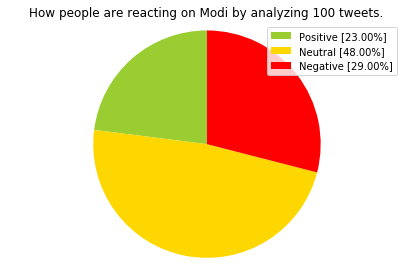

In [83]:
labels=['Positive [' +str(positive)+'%]', 'Neutral [' +str(neutral)+'%]', 'Negative [' +str(negative)+'%]']
sizes=[positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on "+ searchTerm +" by analyzing "+ str(noofsearchTerms)+" tweets.")
plt.axis("equal")
plt.tight_layout()
plt.show();